### Student Information
Name: 吳宇文

Student ID: 112011558

GitHub ID: Wuyuwin

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# First

In [ ]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [ ]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

### ** >>> Exercise 2 (take home):**
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information.

In [ ]:
import pandas as pd

import os
os.chdir('/content/drive/MyDrive/ISA/DM2023-Lab1-Master-main/DM2023-Lab1-Master-main')

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [ ]:
# add category to the dataframe
X['category'] = twenty_train.target

In [ ]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [ ]:
# Filter first 3 data which category is 1
print(X[X['category']==1][0:3])

                                                 text  category  category_name
0   From: sd345@city.ac.uk (Michael Collier) Subje...         1  comp.graphics
1   From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1  comp.graphics
11  From: amjad@eng.umd.edu (Amjad A Soomro) Subje...         1  comp.graphics


In [ ]:
# Query the first 3 data where column 'category' is 1
print(X.query('category==1')[0:3])

                                                 text  category  category_name
0   From: sd345@city.ac.uk (Michael Collier) Subje...         1  comp.graphics
1   From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1  comp.graphics
11  From: amjad@eng.umd.edu (Amjad A Soomro) Subje...         1  comp.graphics


In [ ]:
# Query the numbers of each category
num_category = X.groupby('category').count()
print(num_category)
print('\n')
value_counts = X['category'].value_counts()
print(value_counts)

          text  category_name
category                     
0          480            480
1          584            584
2          594            594
3          599            599


3    599
2    594
1    584
0    480
Name: category, dtype: int64


In [ ]:
# Sort the DataFrame by the "category" column
print(X.sort_values(by='category'))

                                                   text  category  \
745   From: sandvik@newton.apple.com (Kent Sandvik) ...         0   
1504  Subject: Re: Death Penalty (was Re: Political ...         0   
1621  From: nancyo@shnext15.ucslabs.sfu.ca (Nancy Pa...         0   
365   From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...         0   
1798  From: keith@cco.caltech.edu (Keith Allan Schne...         0   
...                                                 ...       ...   
1697  From: dohertyl@dcs.gla.ac.uk (dohertyl) Subjec...         3   
755   From: mike@nx39.mik.uky.edu (Mike Mattone) Sub...         3   
753   From: af664@yfn.ysu.edu (Frank DeCenso, Jr.) S...         3   
1685  From: noye@midway.uchicago.edu (vera shanti no...         3   
1128  From: jono@mac-ak-24.rtsg.mot.com (Jon Ogden) ...         3   

               category_name  
745              alt.atheism  
1504             alt.atheism  
1621             alt.atheism  
365              alt.atheism  
1798            

### >>> **Exercise 5 (take home)**
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [ ]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [ ]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [ ]:
# Answer here
# The isnull() method in pandas checks if each element in a dataframe or series is null or NaN.
# So that, it return with above result.The isnull() only detact null or NaN as True, "C,D,F" are store as string value

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [ ]:
X_sample = X.sample(n=1000,random_state=42) #random state

In [ ]:
# Answer here

 .sample(), is a subset of the original data used for various analytical purposes while preserving the statistical characteristics of the full dataset. Sampled data was carefully selected to represent the larger dataset accurately.

### >>> **Exercise 8 (take home):**
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

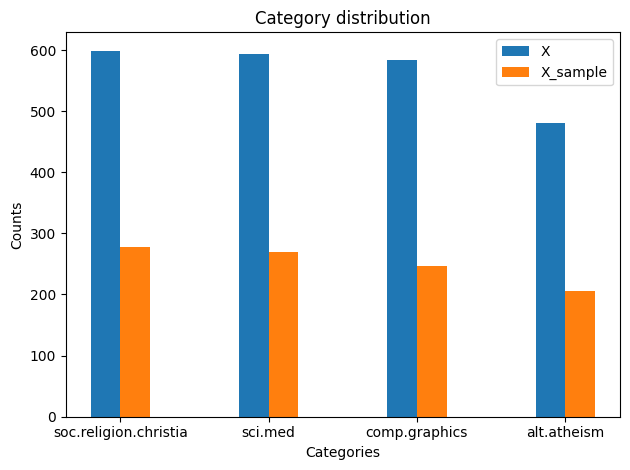

In [ ]:
# Assuming X and X_sample are DataFrames with a 'category_name' column
# Sample data (replace with your actual data)
categories = ['soc.religion.christia', 'sci.med', 'comp.graphics', 'alt.atheism']
data1_counts = X.category_name.value_counts()
data2_counts = X_sample.category_name.value_counts()

# Set the width of the bars
bar_width = 0.2

# Generate positions for bars
r1 = range(len(categories))
r2 = [x + bar_width for x in r1]

# Create the bar plot
plt.bar(list(r1), data1_counts, width=bar_width, label='X')
plt.bar(r2, data2_counts, width=bar_width, label='X_sample')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.xticks([r + bar_width/2 for r in range(len(categories))], categories, rotation=0)
plt.title('Category distribution')

# Add legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [ ]:
X_counts[0:5, 0:40].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])

In [ ]:
# Answer here
count_vect.get_feature_names_out()[0:38]
# another 1 in the same record  represents the '01' term.

array(['00', '000', '0000', '0000001200', '000005102000', '0001',
       '000100255pixel', '00014', '000406', '0007', '000usd', '0010',
       '001004', '0010580b', '001125', '001200201pixel', '0014', '001642',
       '00196', '002', '0028', '003258u19250', '0033', '0038', '0039',
       '004021809', '004158', '004627', '0049', '00500', '005148',
       '00630', '008561', '0094', '00am', '00index', '00pm', '01'],
      dtype=object)

### **>>> Exercise 11 (take home):**
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

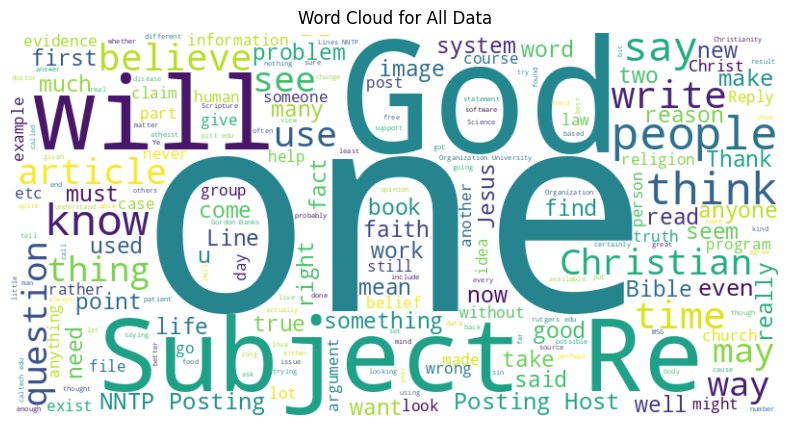

In [ ]:
from wordcloud import WordCloud

# Concatenate all texts
all_text = " ".join(list(X.text))

# Generate a word cloud for all subjects
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for All Data')
plt.show()


### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

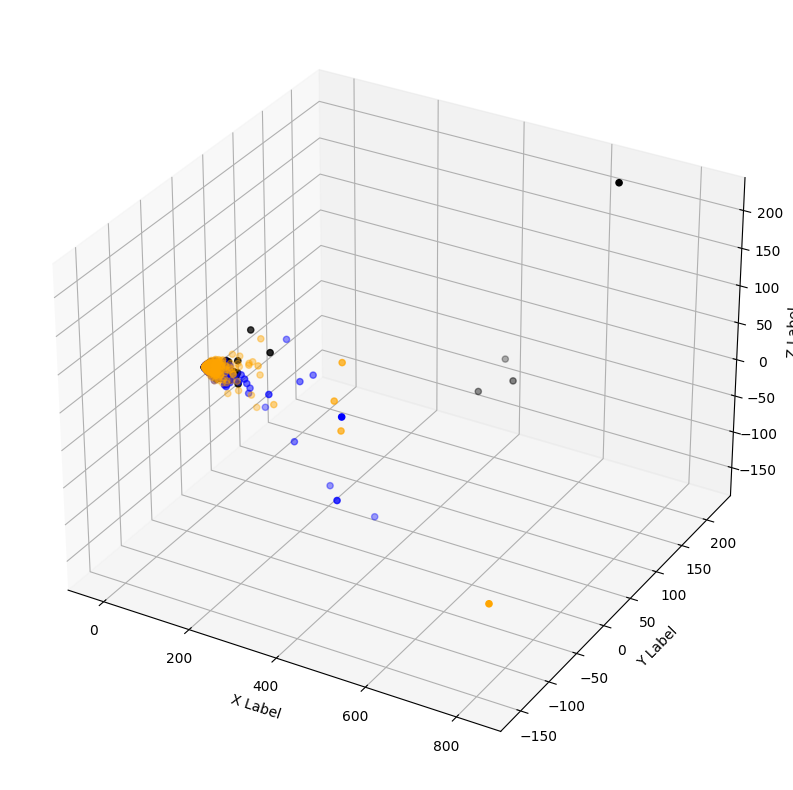

In [ ]:
# Answer here
from sklearn.decomposition import PCA

# Assuming X_reduced is the result of PCA with n_components=3
X_reduced = PCA(n_components=3).fit_transform(X_counts.toarray())

col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]

    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [ ]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))


In [ ]:
term_frequencies[0]

array([134])

In [ ]:
# Answer here
import plotly.express as px
features_300 = count_vect.get_feature_names_out()[:300].tolist()
term_frequencies_300 = np.concatenate(term_frequencies[:300]).tolist()

# Create a bar plot using Plotly Express
fig = px.bar(x=features_300,
        y=term_frequencies_300)

# Rotate x-axis labels for better visibility
fig.update_xaxes(tickangle=90)

# Show the plot
fig.show()


### >>> **Exercise 14 (take home):**
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.


In [ ]:
import seaborn as sns

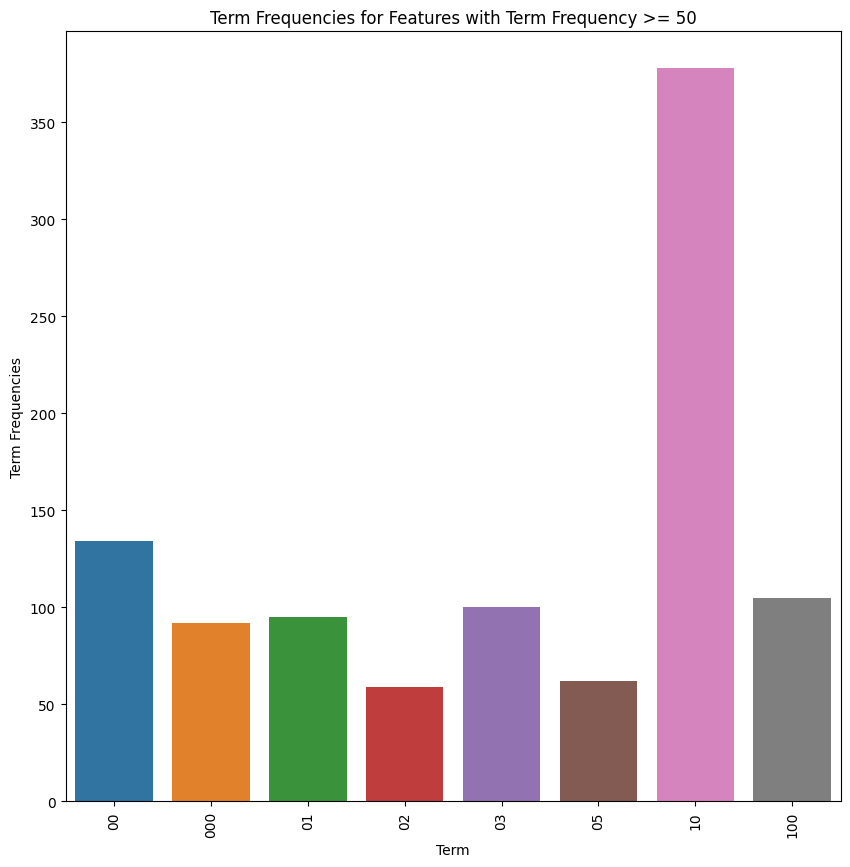

In [ ]:
# Answer here

# Sample data (replace with your actual data)
features_300 = count_vect.get_feature_names_out()[:300].tolist()
term_frequencies_300 = np.concatenate(term_frequencies[:300]).tolist()

# Set the threshold for term frequencies
threshold = 50

# Filter features and term frequencies based on the threshold
filtered_features = [features_300[i] for i in range(len(features_300)) if term_frequencies_300[i] >= threshold]
filtered_term_frequencies = [term_frequencies_300[i] for i in range(len(features_300)) if term_frequencies_300[i] >= threshold]

# Plot the barplot with the filtered terms
plt.figure(figsize=(10, 10))
g = sns.barplot(x=filtered_features, y=filtered_term_frequencies)
g.set_xticklabels(filtered_features, rotation=90)
plt.xlabel('Term')
plt.ylabel('Term Frequencies')
plt.title(f'Term Frequencies for Features with Term Frequency >= {threshold}')
plt.show()

### >>> **Exercise 15 (take home):**
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

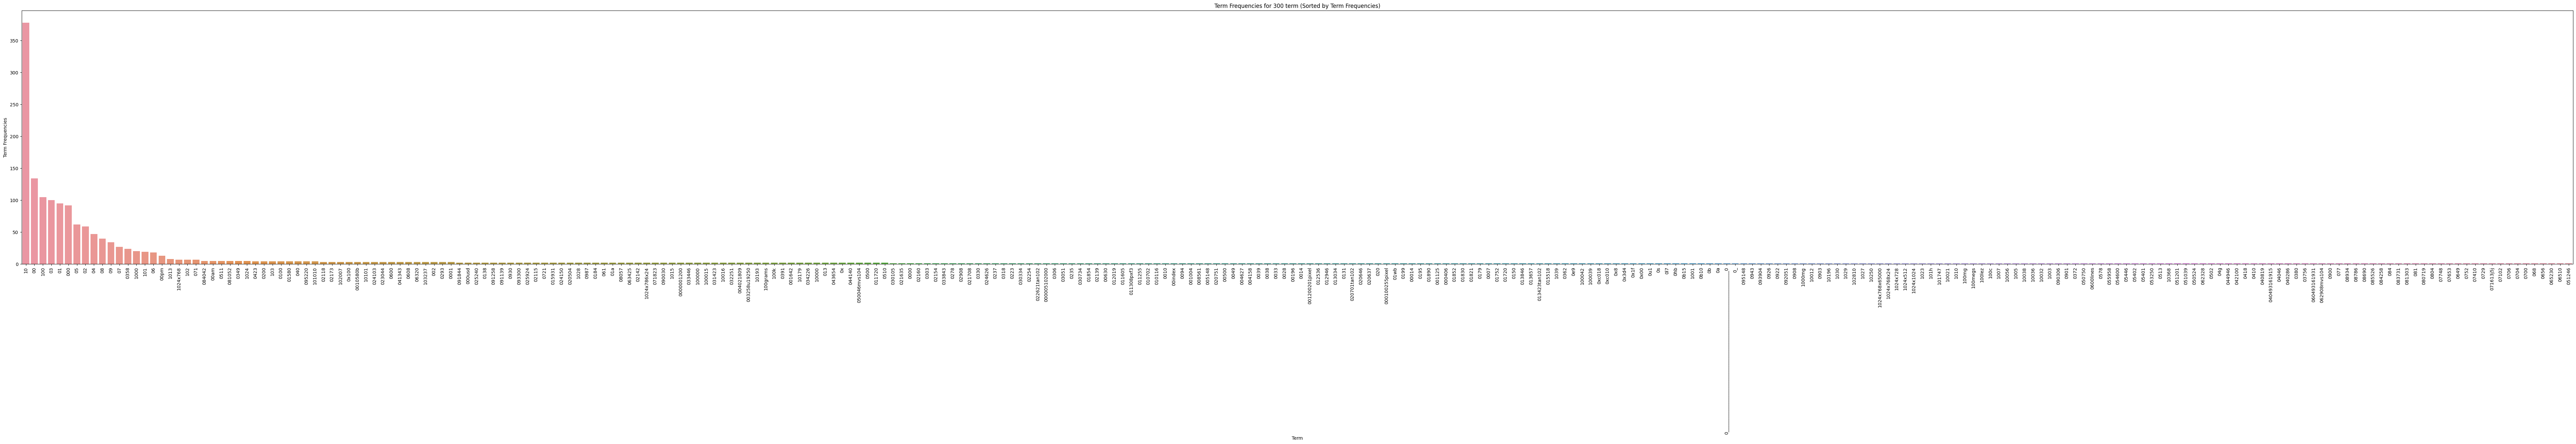

In [ ]:
# Answer here
# Sample data (replace with your actual data)
features_300 = count_vect.get_feature_names_out()[:300].tolist()
term_frequencies_300 = np.concatenate(term_frequencies[:300]).tolist()

# Sort features based on term frequencies
sorted_indices = np.argsort(term_frequencies_300)[::-1]
sorted_features = [features_300[i] for i in sorted_indices]
sorted_term_frequencies = [term_frequencies_300[i] for i in sorted_indices]

# Plot the barplot with sorted features
plt.figure(figsize=(100, 10))
g = sns.barplot(x=sorted_features, y=sorted_term_frequencies)
g.set_xticklabels(sorted_features, rotation=90)

plt.xlabel('Term')
plt.ylabel('Term Frequencies')
plt.title('Term Frequencies for 300 term (Sorted by Term Frequencies)')
plt.show()

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [ ]:
# Answer here

# Generate one-hot encoding based on 'category_name'
one_hot_encoding = pd.get_dummies(X['category_name'])

# Combine the one-hot encoding with the original DataFrame
df = pd.concat([X, one_hot_encoding], axis=1)

# Print the updated DataFrame with one-hot encoding
df[:5]

,text,category,category_name,unigrams,alt.atheism,comp.graphics,sci.med,soc.religion.christian
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...",0,1,0,0
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....",0,1,0,0
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...",0,0,0,1
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...",0,0,0,1
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...",0,0,0,1



# Second part

In [ ]:
os.chdir('/content/drive/MyDrive/ISA/DM2023-Lab1-Master-main/DM2023-Lab1-Master-main/sentiment_labelled_sentences')

In [ ]:
with open('amazon_cells_labelled.txt','r') as file:
  amazon = file.read()
with open('yelp_labelled.txt','r') as file:
  yelp = file.read()
with open('imdb_labelled.txt','r') as file:
  imdb = file.read()

sentence = amazon.split('/n')

In [ ]:
#  Convert into Pandas Dataframe
lines = amazon.split('\n')
data_list = [line.split('\t') for line in lines]
amazon_df = pd.DataFrame(data_list, columns=['sentence', 'score'])
amazon_df['source'] = 'amazon'

lines = yelp.split('\n')
data_list = [line.split('\t') for line in lines]
yelp_df = pd.DataFrame(data_list, columns=['sentence', 'score'])
yelp_df['source'] = 'yelp'

lines = imdb.split('\n')
data_list = [line.split('\t') for line in lines]
imdb_df = pd.DataFrame(data_list, columns=['sentence', 'score'])
imdb_df['source'] = 'imdb'

df = pd.concat([amazon_df,yelp_df,imdb_df], axis=0, ignore_index=True)

In [ ]:
def categorize(score):
  if score=='1':
    return 'positive'
  elif score=='0':
    return 'negative'
  else :
    return np.NaN

df['category'] = df['score'].apply(categorize)

## Data Preprocessing

In [ ]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,source,category
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,3,0,3


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,source,category
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


In [ ]:
sum(df.duplicated('sentence'))

17

In [ ]:
df.drop_duplicates(keep=False, inplace=True)

In [ ]:
sum(df.duplicated('sentence'))

0

## Sampling

In [ ]:
df_sample = df.sample(n=1000,random_state=2)
display(df_sample)

,sentence,score,source,category
1293,"The staff is great, the food is delish, and th...",1,yelp,positive
1859,I probably won't be coming back here.,0,yelp,negative
474,The delivery was on time.,1,amazon,positive
144,The phone takes FOREVER to charge like 2 to 5 ...,0,amazon,negative
1183,I dressed up to be treated so rudely!,0,yelp,negative
...,...,...,...,...
555,It's AGGRAVATING!,0,amazon,negative
1878,Go To Place for Gyros.,1,yelp,positive
2577,I understand that it's supposed to be a cheap ...,0,imdb,negative
1018,Waitress was a little slow in service.,0,yelp,negative


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

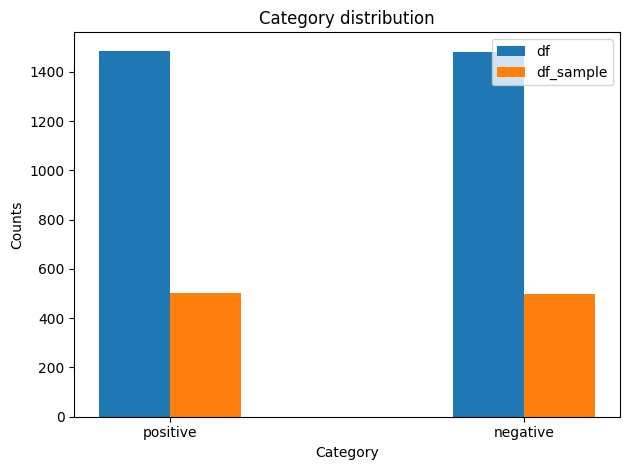

In [ ]:
# Sample data (replace with your actual data)
categories = ['positive', 'negative']
data1_counts = df.category.value_counts()
data2_counts = df_sample.category.value_counts()

# Set the width of the bars
bar_width = 0.2

# Generate positions for bars
r1 = range(len(categories))
r2 = [x + bar_width for x in r1]

# Create the bar plot
plt.bar(list(r1), data1_counts, width=bar_width, label='df')
plt.bar(r2, data2_counts, width=bar_width, label='df_sample')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Counts')
plt.xticks([r + bar_width/2 for r in range(len(categories))], categories, rotation=0)
plt.title('Category distribution')

# Add legend
plt.legend(loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()

## Feature subset

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df['unigrams'] = df['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.sentence)

In [ ]:
print(df_counts.shape)

(2966, 5153)


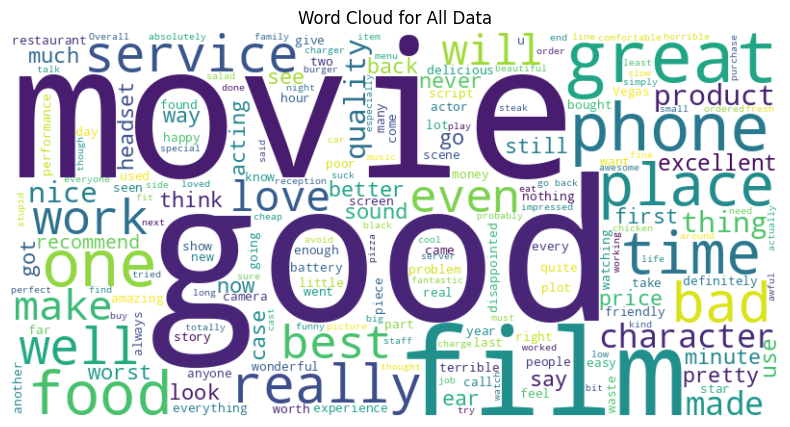

In [ ]:
from wordcloud import WordCloud

# Concatenate all texts
all_text = " ".join(list(df.sentence))

# Generate a word cloud for all subjects
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for All Data')
plt.show()

## PCA

In [ ]:
# Assuming X_reduced is the result of PCA
df_reduced = PCA(n_components=2).fit_transform(df_counts.toarray())

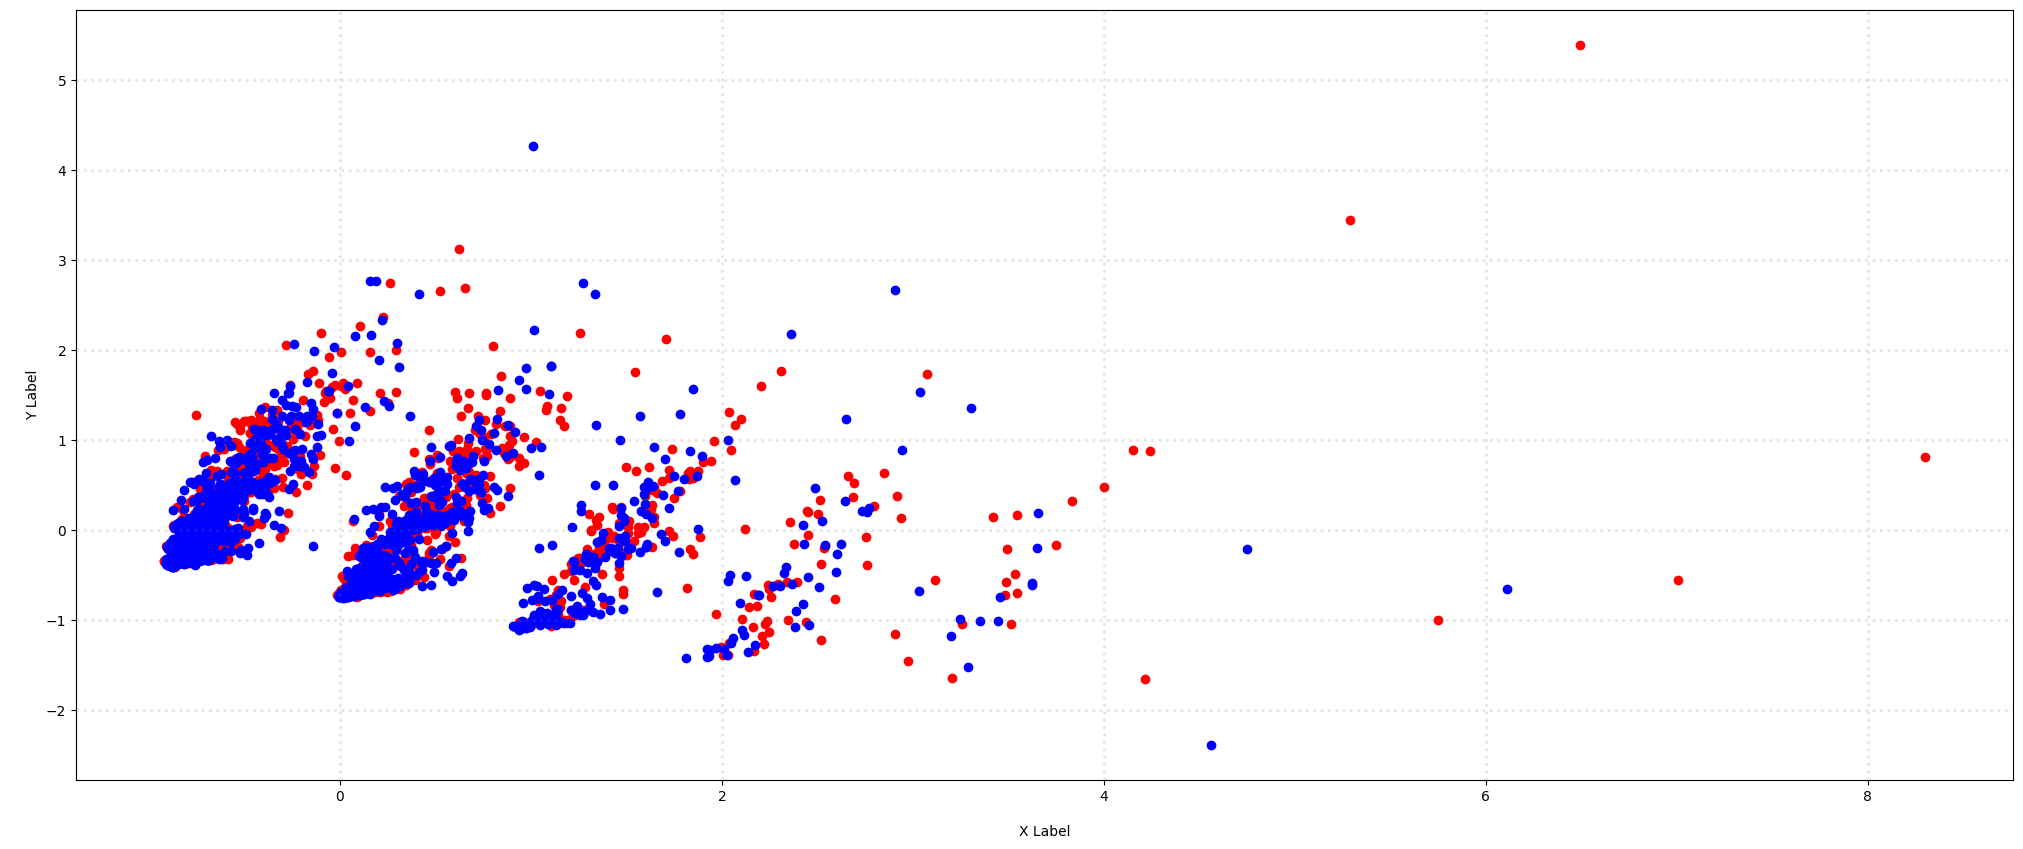

In [ ]:
categories = ['positive', 'negative']
col = ['red', 'blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = df_reduced[df['category'] == category].T[0]
    ys = df_reduced[df['category'] == category].T[1]

    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

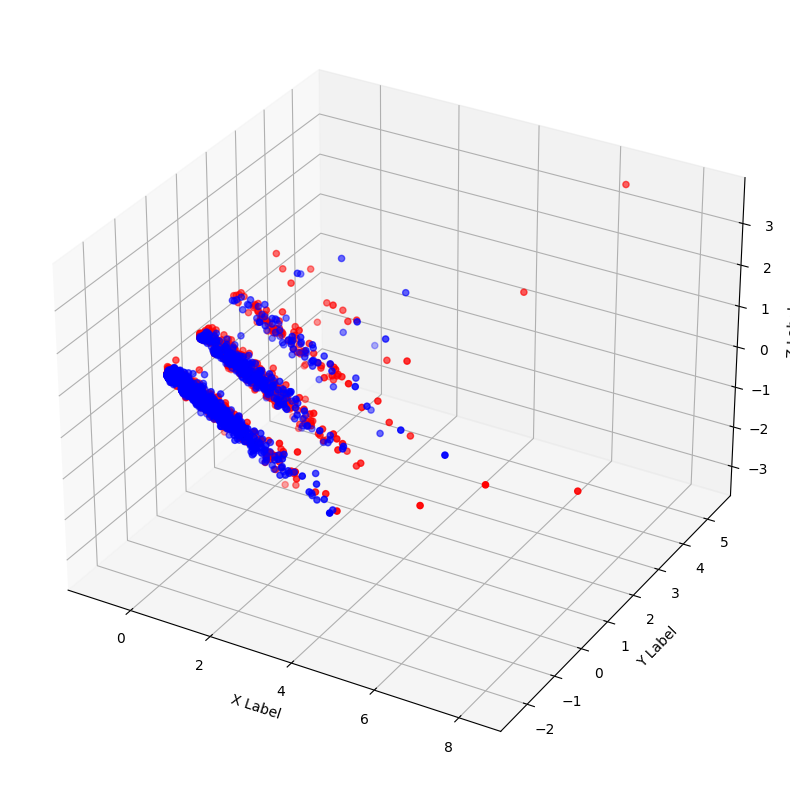

In [ ]:
categories = ['positive', 'negative']
col = ['red', 'blue']

df_reduced = PCA(n_components=3).fit_transform(df_counts.toarray())

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(projection='3d')

for c, category in zip(col, categories):
    xs = df_reduced[df['category'] == category].T[0]
    ys = df_reduced[df['category'] == category].T[1]
    zs = df_reduced[df['category'] == category].T[2]

    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

## Attribute Transformation / Aggregation

In [ ]:
term_frequencies = []
print(df_counts.shape[1])
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

5153


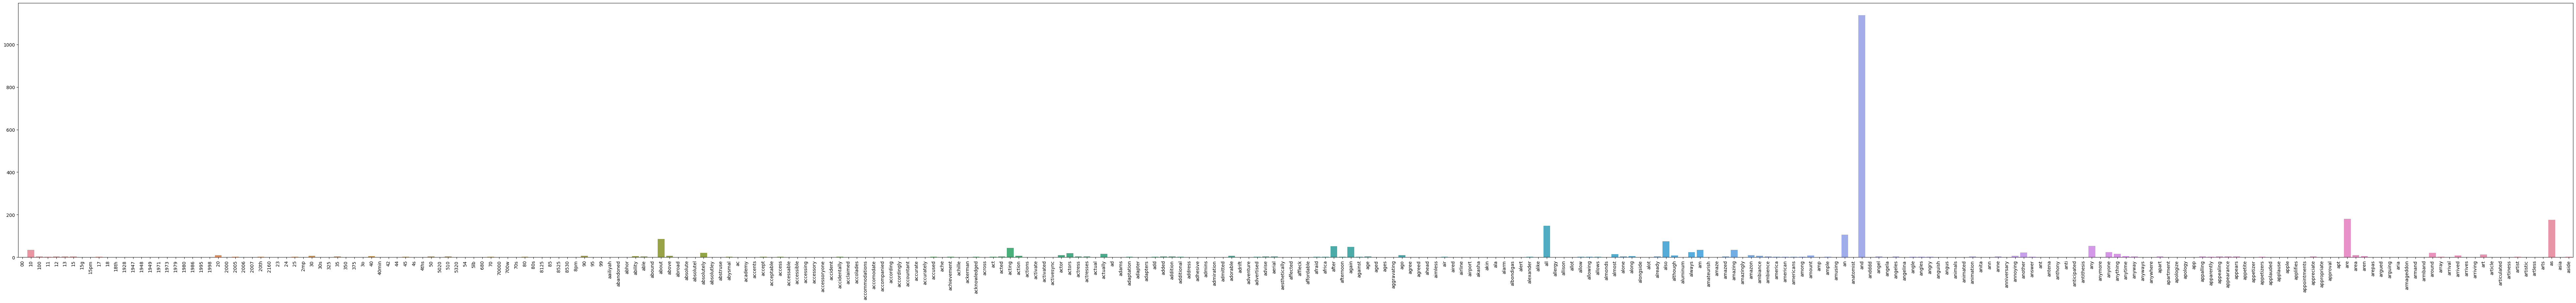

In [ ]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300].tolist(),
            y=np.concatenate(term_frequencies[:300]).tolist())
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

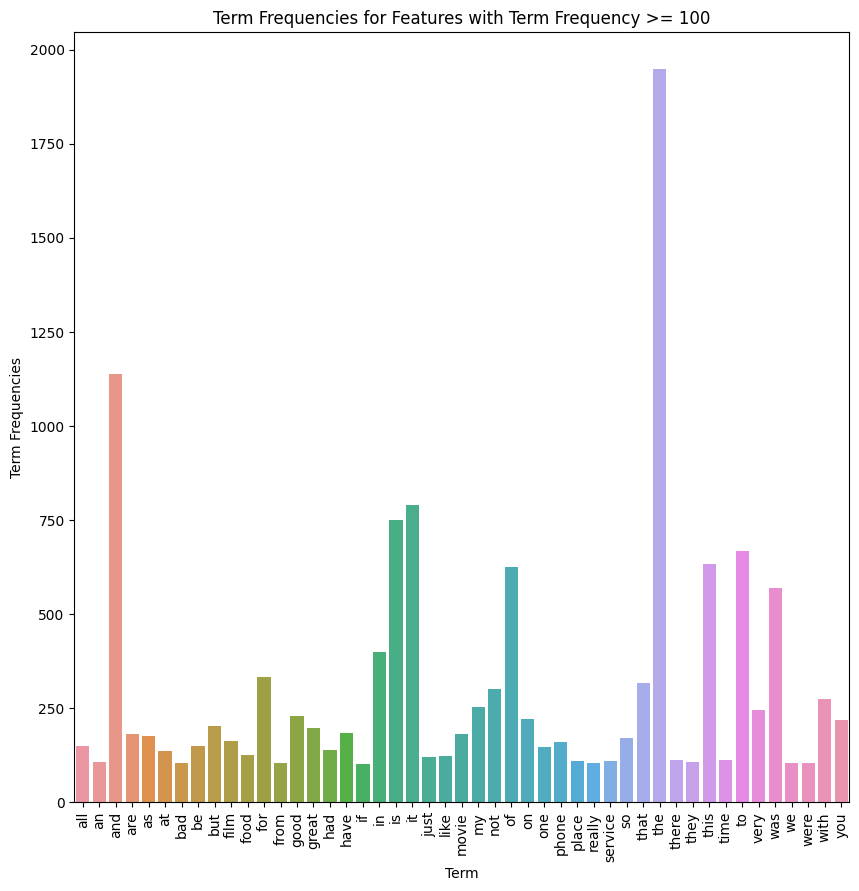

In [ ]:
# Sample data (replace with your actual data)
features_all = count_vect.get_feature_names_out().tolist()
term_frequencies_all = np.concatenate(term_frequencies).tolist()

# Set the threshold for term frequencies
threshold = 100

# Filter features and term frequencies based on the threshold
filtered_features = [features_all[i] for i in range(len(features_all)) if term_frequencies_all[i] >= threshold]
filtered_term_frequencies = [term_frequencies_all[i] for i in range(len(features_all)) if term_frequencies_all[i] >= threshold]

# Plot the barplot with the filtered terms
plt.figure(figsize=(10, 10))
g = sns.barplot(x=filtered_features, y=filtered_term_frequencies)
g.set_xticklabels(filtered_features, rotation=90)
plt.xlabel('Term')
plt.ylabel('Term Frequencies')
plt.title(f'Term Frequencies for Features with Term Frequency >= {threshold}')
plt.show()

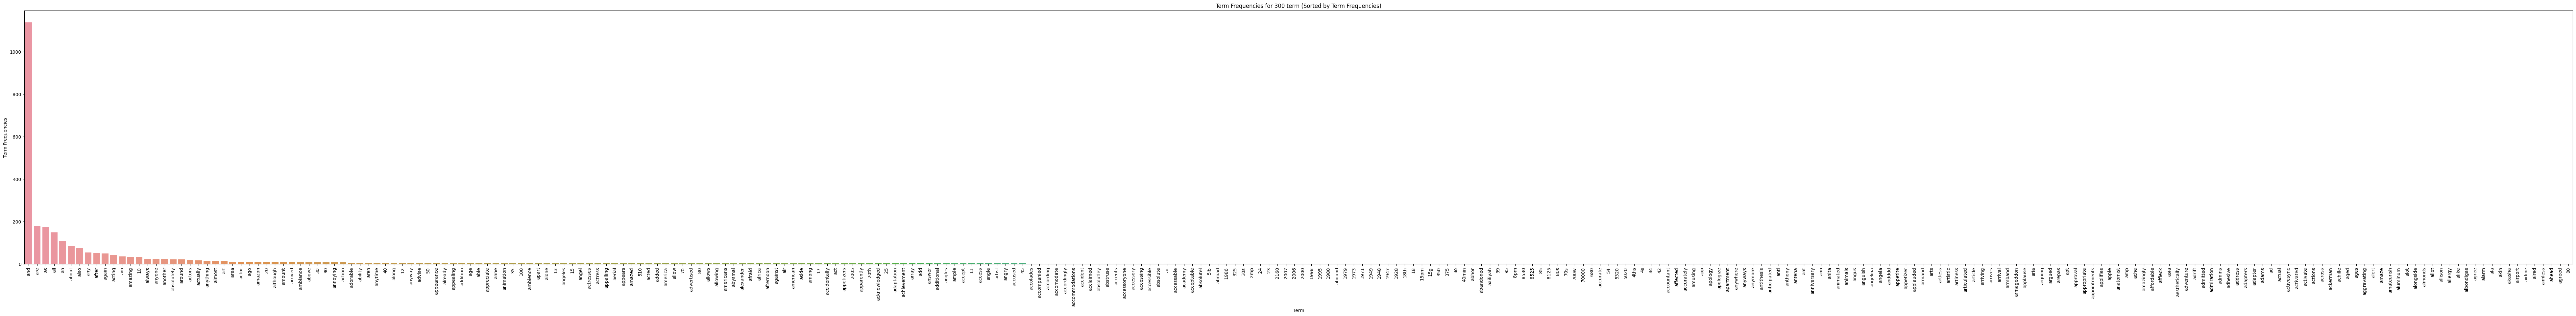

In [ ]:
# Sample data (replace with your actual data)
features_300 = count_vect.get_feature_names_out()[:300].tolist()
term_frequencies_300 = np.concatenate(term_frequencies[:300]).tolist()

# Sort features based on term frequencies
sorted_indices = np.argsort(term_frequencies_300)[::-1]
sorted_features = [features_300[i] for i in sorted_indices]
sorted_term_frequencies = [term_frequencies_300[i] for i in sorted_indices]

# Plot the barplot with sorted features
plt.figure(figsize=(100, 10))
g = sns.barplot(x=sorted_features, y=sorted_term_frequencies)
g.set_xticklabels(sorted_features, rotation=90)

plt.xlabel('Term')
plt.ylabel('Term Frequencies')
plt.title('Term Frequencies for 300 term (Sorted by Term Frequencies)')
plt.show()

In [ ]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

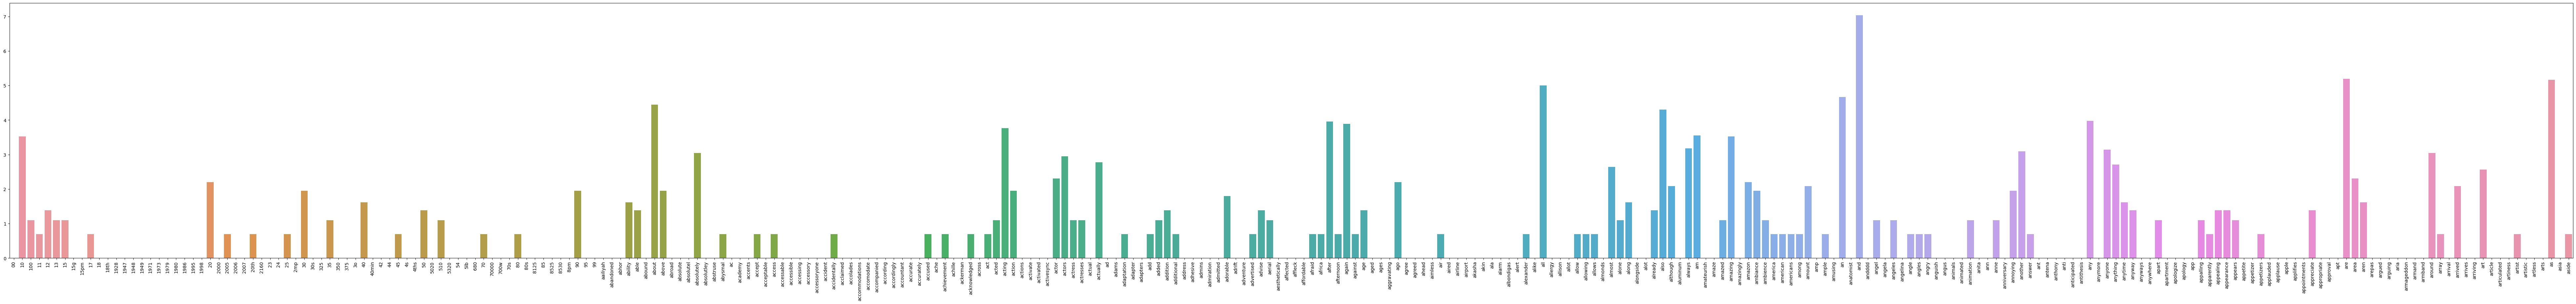

In [ ]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300].tolist(),
            y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

## Binarization

In [ ]:
from sklearn import preprocessing

mlb = preprocessing.LabelBinarizer()
mlb.fit(df.category)

LabelBinarizer()

In [ ]:
df['bin_category'] = mlb.transform(df['category']).tolist()
df[0:10]

,sentence,score,source,category,unigrams,bin_category
0,So there is no way for me to plug it in here i...,0,amazon,negative,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,amazon,positive,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,amazon,positive,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,amazon,negative,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,amazon,positive,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,amazon,negative,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,amazon,negative,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,amazon,positive,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,amazon,negative,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]
9,What a waste of money and time!.,0,amazon,negative,"[What, a, waste, of, money, and, time, !, .]",[0]


## Data Exploration

In [ ]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = df.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[51]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[52]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

In [ ]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['good protection and does not make phone too bulky.']
['A usable keyboard actually turns a PDA into a real-world useful machine instead of just a neat gadget.']
["This phone is pretty sturdy and I've never had any large problems with it."]


In [ ]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.178174
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


# Third

## Generate meaningful new data visualizations

### Pie Chart of Sentence Proportions

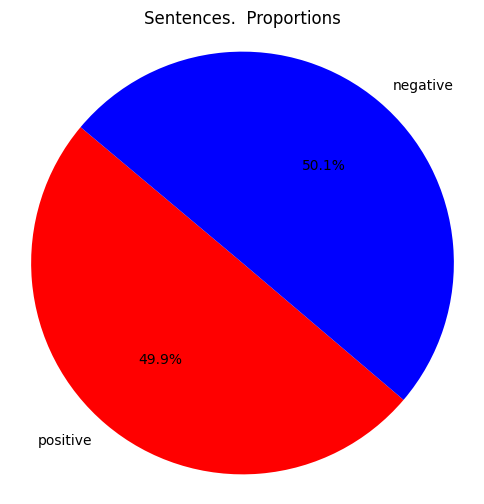

In [ ]:
# Define the data (proportions of positive and negative sentiments)
labels = ['positive', 'negative']
num_category = df.groupby('category').count()
sizes = [num_category.loc['positive']['sentence'], num_category.loc['negative']['sentence']]  # You should replace these with your actual proportions

# Define colors for the sections of the pie chart
colors = ['red', 'blue']

# Create a pie chart
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Sentences.  Proportions')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()


### Word Clouds for Positive and Negative Sentences

In [ ]:
# Create an empty dictionary to store dataframes
category_data = {}

# Iterate through unique categories and split the data
for category in df['category'].unique():
    category_data[category] = df[df['category'] == category]

# Access the data for a specific category
category_A_data = category_data['positive']
category_B_data = category_data['negative']


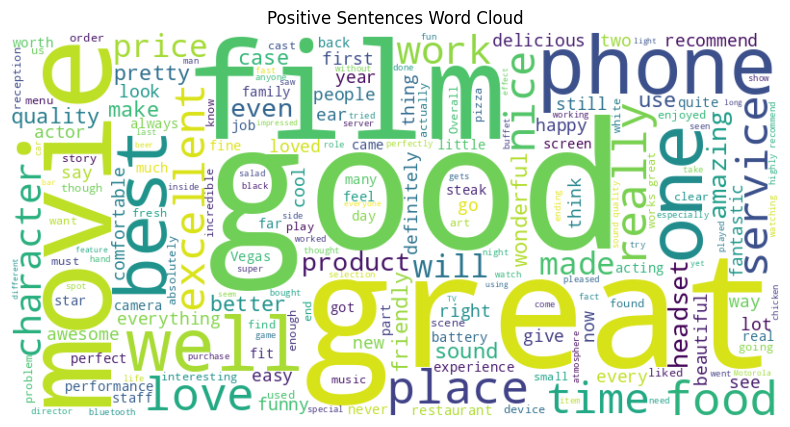

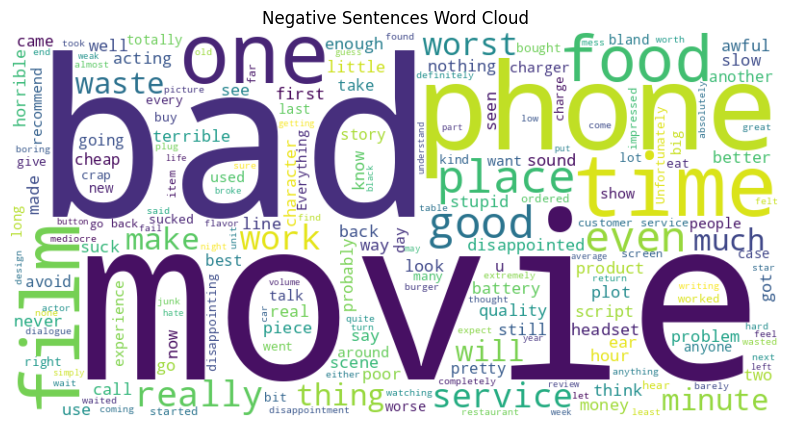

In [ ]:
# Define a function to generate word clouds
def generate_word_cloud(text_series, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(text_series))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

# Create word clouds for positive and negative sentences
generate_word_cloud(category_A_data['sentence'], "Positive Sentences Word Cloud")
generate_word_cloud(category_B_data['sentence'], "Negative Sentences Word Cloud")

### Stacked Bar Chart by Category

In [ ]:
# Create an empty dictionary to store dataframes
source_data = {}

# Iterate through unique categories and split the data
for source in df['source'].unique():
    source_data[source] = df[df['source'] == source]

# Access the data for a specific category
source_A_data = source_data['amazon']
source_B_data = source_data['imdb']
source_C_data = source_data['yelp']

# Create count for each source by category
num_sourceA_category = source_A_data.groupby('category').count()
num_sourceB_category = source_B_data.groupby('category').count()
num_sourceC_category = source_C_data.groupby('category').count()

source_categoru_data = {
    "source": ["amazon", "amazon", "imdb", "imdb", "yelp", "yelp"],
    "category": ["negative", "positive", "negative", "positive", "negative", "positive"],
    "count": [num_sourceA_category.loc['negative']['sentence'], num_sourceA_category.loc['positive']['sentence'], num_sourceB_category.loc['positive']['sentence'], num_sourceC_category.loc['negative']['sentence'], num_sourceC_category.loc['positive']['sentence'], num_sourceA_category.loc['negative']['sentence']]
}

source_categoru_df = pd.DataFrame(source_categoru_data)

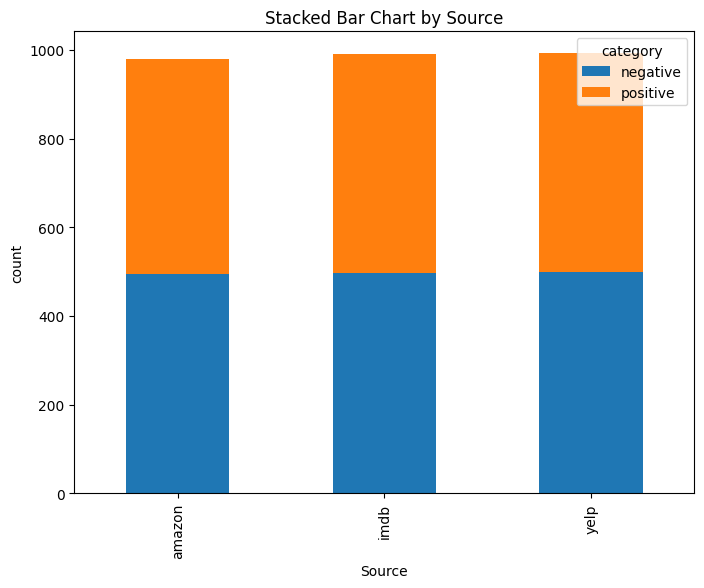

In [ ]:
# Pivot the data to create a multi-index DataFrame
pivoted_data = source_categoru_df.pivot(index="source", columns="category", values="count")

# Create a stacked bar chart
ax = pivoted_data.plot(kind="bar", stacked=True, figsize=(8, 6))

# Customize the chart
plt.title("Stacked Bar Chart by Source")
plt.xlabel("Source")
plt.ylabel("count")
plt.legend(title="category")

# Show the chart
plt.show()


## Generate TF-IDF features

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Create Count vectors
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.sentence)


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

# Calculate TF-IDF
transformer = TfidfTransformer()
tfidf_matrix = transformer.fit_transform(df_counts)


In [ ]:
# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=count_vect.get_feature_names_out())

# Display the TF-IDF matrix
display(tfidf_df)


,00,10,100,11,12,13,15,15g,15pm,17,...,yucky,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Naive Bayes Classifier

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Sample data
documents = df.sentence.tolist()
labels = df.bin_category.tolist()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(documents, labels, test_size=0.2, random_state=42)

# Create TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Naive Bayes classifier using TF-IDF features
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred = nb_classifier.predict(X_test_tfidf)

# Evaluate the classifier
print("Naive Bayes Classifier with TF-IDF Features:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Naive Bayes Classifier with TF-IDF Features:
Accuracy: 0.8047138047138047
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       272
           1       0.87      0.75      0.81       322

    accuracy                           0.80       594
   macro avg       0.81      0.81      0.80       594
weighted avg       0.81      0.80      0.80       594



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Create Count vectors
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# Train a Naive Bayes classifier using word frequency features
nb_classifier_wordfreq = MultinomialNB()
nb_classifier_wordfreq.fit(X_train_count, y_train)

# Predict on test data
y_pred_wordfreq = nb_classifier_wordfreq.predict(X_test_count)

# Evaluate the classifier
print("Naive Bayes Classifier with Word Frequency Features:")
print("Accuracy:", accuracy_score(y_test, y_pred_wordfreq))
print(classification_report(y_test, y_pred_wordfreq))


Naive Bayes Classifier with Word Frequency Features:
Accuracy: 0.7962962962962963
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       272
           1       0.84      0.77      0.80       322

    accuracy                           0.80       594
   macro avg       0.80      0.80      0.80       594
weighted avg       0.80      0.80      0.80       594



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



# Fourth

I encountered some type errors in Exercise 13 when I tried to get the feature terms and term frequencies. The type is not always in the list or array, probably due to me repeating some parts. So in the second part I do a ".tolist()" when getting the feature terms and term frequencies to make sure they are all in the same type